Use the tutorial to focus on exploring linear transformations in 2D and 3D spaces, including operations such as scaling, shearing, reflections, rotations, and translations, while drawing connections to their extensions in higher-dimensional linear transformations. Additionally, you should explain the relationship between linear transformations and non-linear transformations including affine, thus bridging the gap between linear and more complex transformations.

## Linear transformations

A linear transformation changes the space of a matrix while preserving the basic structure. We can scale, shear, reflect, rotate or translate the matrix preserving the proportional relations between different points.  

Linear transformations is defined as $T : \mathbb{R}^{\mathbb{N}} \rightarrow \mathbb{R}^{\mathbb{M}}$ meaning a transformation from a matrix $A \in \mathbb{R}^{\mathbb{N}}$, with the following two properties holding true for $u, v \in \mathbb{R}^{\mathbb{N}}$ and scalar $c \in \mathbb{R}$:  
1. $T(u+v) = T(u) + T(v)$ (additive)  
2. $T(cu) = cT(u)$  (homogenous of degree 1)  

In this section I will go through different operations showing with code snippets how the transformation alters the matrix and later will discuss affine transformations that slightly differ from the above definition.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)

"""Copy pasta from tutorial on iml.itu.dk"""
def plot_points(points, t_points, origin=(0, 0)):
    """
    Displays the points and t_points in separate subplots and where the points with the same index have the same color
    
    Args:
        points: matrix of 2D points.
        t_points: matrix of transformed 2D points.
        origin: it is simply show the origin and is (0,0) by default.
    """
    color_lut = 'rgbcmy'
    fig, (ax1, ax2) = plt.subplots(1, 2)
    xs_t = []
    ys_t = []
    xs = []
    ys = []
    i = 0

    text_offset = 0.15
    ax1.scatter(origin[0], origin[1], color='k')
    ax1.text(origin[0] + text_offset, origin[1], "o")
    ax2.scatter(origin[0], origin[1], color='k')
    ax2.text(origin[0] + text_offset, origin[1], "o")

    for row, t_row in zip(points.T, t_points.T):
        x_s, y_s = row
        x_s_t, y_s_t = t_row
        xs.append(x_s)
        ys.append(y_s)
        xs_t.append(x_s_t)
        ys_t.append(y_s_t)
        c_s = color_lut[i]  # these are the same but, its good to be explicit
        ax1.scatter(x_s, y_s, color=c_s)
        ax1.text(x_s + text_offset, y_s, str(i))
        ax2.scatter(x_s_t, y_s_t, color=c_s)
        ax2.text(x_s_t + text_offset, y_s_t, str(i))
        i += 1
    xs.append(xs[0])
    ys.append(ys[0])
    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    ax1.plot(xs, ys, color="gray", linestyle='dotted')
    ax1.set_xticks(np.arange(-2.5, 3, 1))
    ax1.set_yticks(np.arange(-2.5, 4, 1))
    ax2.plot(xs_t, ys_t, color="gray", linestyle='dotted')
    ax2.set_xticks(np.arange(-2.5, 3, 1))
    ax2.set_yticks(np.arange(-2.5, 4, 1))
    ax1.grid()
    ax2.grid()
    plt.show()

x = np.array([1, 2])
A = np.array([[0, 1], [1, 0], [0, -1], [-1, 0]]).T

print("point x=\n", x)
print("matrix A=\n", A)

point x=
 [1 2]
matrix A=
 [[ 0  1  0 -1]
 [ 1  0 -1  0]]


## Scaling

Scaling is the transformation where each component is multiplied for some factor. For our 2d space with points from $A$, we can scale the points by multiplying a scaling matrix of the following form:  

$T_{SC}=\begin{bmatrix}
    s_x & 0 \\
    0 & s_y \\
\end{bmatrix}$

We will multiply the matrices such that $A' = T_{SC} \cdot A$ where $A$ is the original matrix and $A'$ is the transformed matrix.  
Here, we will scale the $x$-components with $s_x$ and $y$-components with $s_y$. Let us visualize that for the following transformation matrix for scaling $x$ by 2 and $y$ by 3:  

$T_{SC}=\begin{bmatrix}
    2 & 0 \\
    0 & 3 \\
\end{bmatrix}$

x'=
 [2 6]


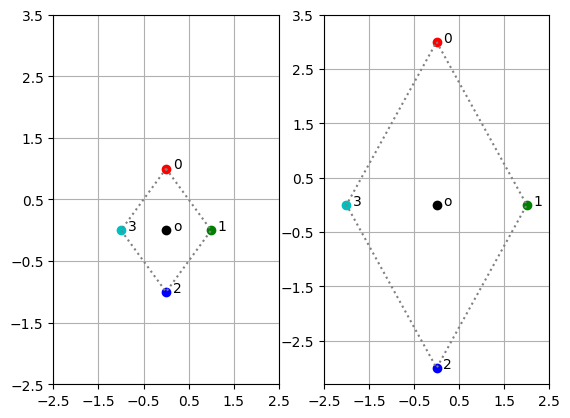

In [37]:
T_SC = np.array([[2, 0], [0, 3]])

print("x'=\n", T_SC @ x)

plot_points(A, T_SC @ A)

## Shearing

We have two types of shearing, horizontal and vertical. In essence, we add to one coordinate component the shearing factor $sh_x$ or $sh_y$ multiplied by the coordinate's other component using one of the following two shearing matrices $T_{s_x}$ for horizontal shearing and $T_{s_y}$ for vertical shearing.

$T_{s_x} =
\begin{bmatrix}
    1 & sh_x \\
    0 & 1 \\
\end{bmatrix} \&\ T_{s_y} =
\begin{bmatrix}
    1 & 0 \\
    sh_y & 1 \\
\end{bmatrix}$

The resulting vector for a point $p = \begin{bmatrix} x \\ y \end{bmatrix}$ will after matrix multiplication be $p' = \begin{bmatrix} x+y*sh_x \\ y \end{bmatrix}$ for a horizontal shear and $p' = \begin{bmatrix} x \\ y + x * sh_y \end{bmatrix}$ for a vertical shear.

See below our initial figure sheared horizontally in the left image and vertically in the right picture, both with a shearing factor of 1:

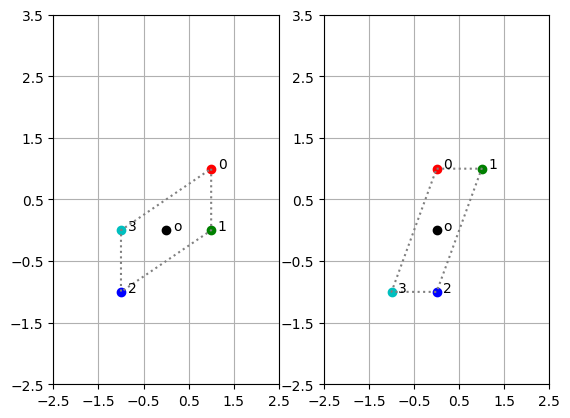

In [38]:
T_s_x = np.array([[1, 1], [0, 1]])
T_s_y = np.array([[1, 0], [1, 1]])

T_Sx = T_s_x @ A
T_Sy = T_s_y @ A

plot_points(T_Sx, T_Sy)

## Reflection

We can transform our points as if they were mirrored against some invisible line.

The rotation matrix looks like $T_R = \begin{bmatrix} \pm 1 & 0 \\ 0 & \pm 1 \end{bmatrix}$ and if the top-left is negative, the reflection is done along the $y$-axis and if it is the bottom-right component, the reflection is done along the $x$-axis. It is possible to combine both by having both values negative.

As such, reflection looks a lot like scaling transformations since it uses the same components and is essentially just a scaling with a negative unit factor for the components that needs to be mirrored.

Note that for the example, I have translated (moved) the points just above / to the right of the axis they are reflected on for both examples, as it would otherwise be equivalent to "flipping it over" in the spot. See the below plots, first for a rotation of the points along the x-axis and then a reflection along the y-axis.

Reflection on X-axis


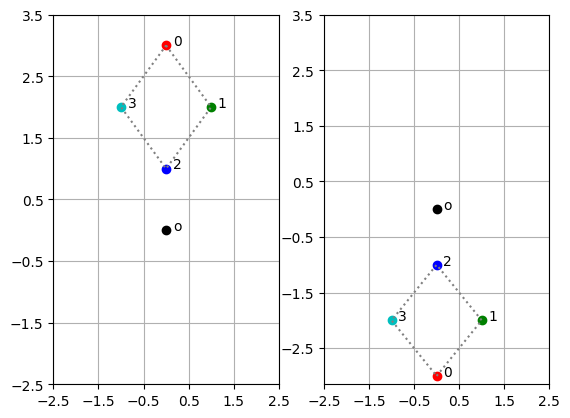

Reflection on Y-axis


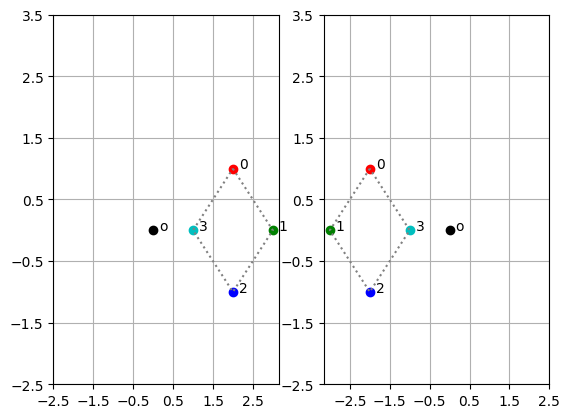

In [39]:
A_1 = A + np.array([0, 2])[:, np.newaxis]
A_2 = A + np.array([2, 0])[:, np.newaxis]

T_R_x = np.array([[1, 0], [0, -1]]) @ (A_1)
T_R_y = np.array([[-1, 0], [0, 1]]) @ (A_2)

print("Reflection on X-axis")
plot_points(A_1, T_R_x)

print("Reflection on Y-axis")
plot_points(A_2, T_R_y)


## Rotation

Rotating is done with a transformation matrix $T_R = \begin{bmatrix} \cos{\theta} & - \sin{\theta} \\ \sin{\theta} & \cos{\theta} \end{bmatrix}$ for an anti-clockwise rotation of $\theta$ degrees.

This transformation matrix will rotate the points around the origin $(0, 0)$ but it is easy to rotate around any given point by subtracting the matrix with a point $p$, perform the rotation and add back the point $p$ - simulating moving the points to be centered around $p$ rather than origin and then move them back afterwards.

In the below code snippet we calculate a 30-degree anti-clockwise rotation with the above rotation matrix and $\theta = 30$ around the origin.

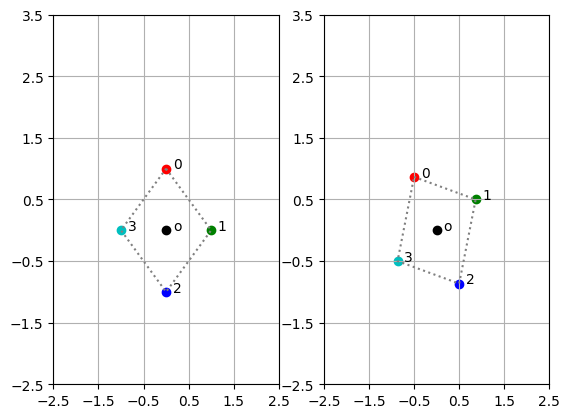

In [40]:
angle = 30
theta = np.radians(angle)
T_R = np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])

A_prime = T_R @ A

plot_points(A, A_prime)

### Combination of linear transformations

We can combine multiple linear transformations into a single transformation matrix. Consider our scaling matrix $T_{SC}$ and our rotation matrix $T_R$. Combining these into a single matrix ($T_{R-SC} = T_{SC} \cdot T_R$) gives us a single transformation matrix that we can apply with only one matrix multiplication as shown below, which is equivalent to first rotating $A$ before scaling it.

T_R_SC =
 [[ 1.7321 -1.    ]
 [ 1.5     2.5981]]


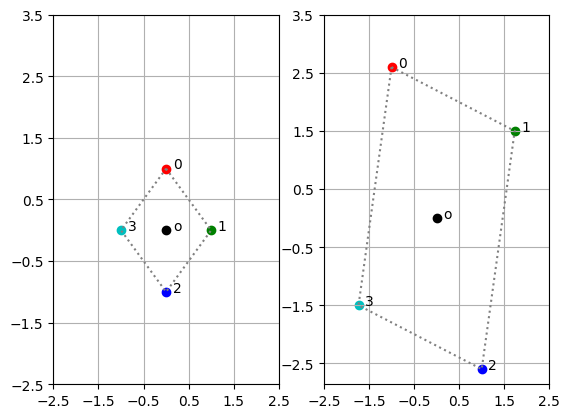

In [50]:
T_R_SC = T_SC @ T_R

print("T_R_SC =\n", T_R_SC)

plot_points(A, T_R_SC @ A)

## 3d linear transformations

The linear transformations does not only hold for 2d but are more easily visualized for 2d. Below is however an example of a rotation matrix, including all the code necessary to plot the graph and rotate it over the X-axis (can also be done for the two other axes):

A =
 [[ 0  1  0 -3]
 [ 2  0 -1  0]
 [ 0  0  0  2]]
A' =
 [[ 0.      1.      0.     -3.    ]
 [ 1.7321  0.     -0.866  -1.    ]
 [ 1.      0.     -0.5     1.7321]]


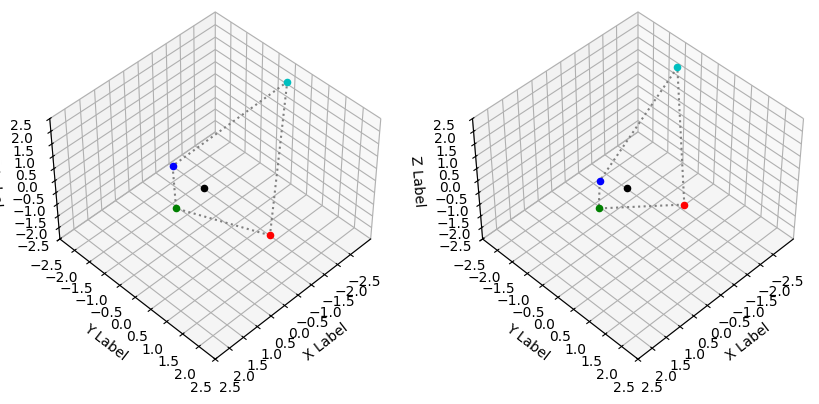

In [46]:
""" copy pasta code from iml.itu.dk """
def plot3d_points(points, t_points, view_point=45):
    """This function get a matrix of 3D points and transformed points and them in separate subplots.
    The details are not important for understanding the course material.
    
    Args:
        points: matrix of 3D points
        t_points: matrix of transformed 3D points
        view_point: view point if 3D plot in degree
    """
    color_lut = 'rgbcmy'
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 10), subplot_kw=dict(projection='3d'))
    ax.view_init(elev=45., azim=view_point)
    ax2.view_init(elev=45., azim=view_point)
    
    xs = []
    ys = []
    zs = []

    xs_t = []
    ys_t = []
    zs_t = []
    i = 0
    ax.scatter(0, 0, 0, color='k')
    ax2.scatter(0, 0, 0, color='k')
    for row, t_row in zip(points.T, t_points.T):
        x, y, z = row
        xs.append(x)
        ys.append(y)
        zs.append(z)
        c = color_lut[i]  # these are the same but, its good to be explicit
        ax.scatter(x, y, z, color=c)

        x_t, y_t, z_t = t_row
        xs_t.append(x_t)
        ys_t.append(y_t)
        zs_t.append(z_t)
        c_t = color_lut[i]  # these are the same but, its good to be explicit
        ax2.scatter(x_t, y_t, z_t, color=c_t)

        i += 1

    xs.append(xs[0])
    ys.append(ys[0])
    zs.append(zs[0])
    ax.plot(xs, ys, zs, color="gray", linestyle='dotted')
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_xticks(np.arange(-2.5, 3, 0.5))
    ax.set_yticks(np.arange(-2.5, 3, 0.5))
    ax.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()

    xs_t.append(xs_t[0])
    ys_t.append(ys_t[0])
    zs_t.append(zs_t[0])
    ax2.plot(xs_t, ys_t, zs_t, color="gray", linestyle='dotted')
    ax2.set_xlabel('X Label')
    ax2.set_ylabel('Y Label')
    ax2.set_zlabel('Z Label')
    ax2.set_xticks(np.arange(-2.5, 3, 0.5))
    ax2.set_yticks(np.arange(-2.5, 3, 0.5))
    ax2.set_zticks(np.arange(-2.5, 3, 0.5))
    plt.grid()

    plt.show()

    
T_R_3d = np.array([
                [1, 0, 0],
                [0, math.cos(theta), -math.sin(theta)],
                [0, math.sin(theta), math.cos(theta)],
            ], dtype=np.float64)

# 3d points 
a, b, c, d = [0, 2, 0], [1, 0, 0], [0, -1, 0], [-3, 0, 2]

# matrix with row vectors of points
A_3d = np.array([a, b, c, d]).T
print('A =\n', A_3d)

A_3d_prime = T_R_3d @ A_3d

print('A\' =\n', A_3d_prime)

plot3d_points(A_3d, A_3d_prime)

# Affine transformations

As shown above, we can chain multiple 2d linear transformations together, which also holds for the case of 3d transformations. This is possible since a chain of multiple linear $d \times d$ transformations will still keep a $d \times d$ transformation matrix that we can apply to data points of dimensionality $n \times d$. When we work with affine transformations, following the form $Ax + b = y$, we no longer have this property. This is because the translation $b$ is not the same $d \times d$ but instead a $d$-dimensional vector moving each point. There is a trick using homogenous coordinates essentially representing a $d$-dimensional data point in $d+1$ dimensions.